# Initializations
Categories: https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories

Country Codes: https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes

In [6]:
CATEGORY = 0
GEO_CODE = None  # ='worldwide'
TIMEFRAME = '2022-01-01 2022-12-31'
FONT = 'Century Gothic'

# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pytrends.request import TrendReq

# Define Keywords 
Official Google Trends: https://trends.google.com/trends

In [19]:
KEYWORDS = ["Covid",
            "metaverse",
            #"blockchain",
            "climate crisis",
            "Ukraine",
            #"War",
            #"Gasmangel",
            #"Energiekrise",
            #"Mobilitätswende",
            "Mariupol",
            #"Twitter",
            "Stranger Things",
            "James Webb",
            "Beyoncé", #"Boris Johnson",
            "stable diffusion",
            "Iran",
            "Mastodon",
            "Katar",
            "energy crisis", #"last generation",
            #"Dall-e",
            #"generative AI",
            "chatbot",
            "ChatGPT",
            ]

# Get Data

In [20]:
pytrends = TrendReq(tz=1000)#360)

In [21]:
# Dividing keyword list into chunks as API only takes up to 5 elements at a time
def chunk_generator(lst, n=1):
    for i in range(0, len(lst), n):
        yield lst[i:i+n]

chunks = chunk_generator(KEYWORDS)

df = pd.DataFrame(columns=['date'])
for chunk in chunks:
    pytrends.build_payload(chunk, cat=CATEGORY,
                           geo=GEO_CODE,
                           timeframe=TIMEFRAME)
    df_chunk = pytrends.interest_over_time()
    df_chunk = df_chunk.drop('isPartial', axis=1)
    df = pd.merge(df, df_chunk, how='right', on='date')
df = df.set_index('date')

# Normalize Data

In [22]:
df = df*(100/df.max())
df_longform = df.reset_index().melt(id_vars=['date'],
                                    var_name='Keyword',
                                    value_name='Interest')

# Visualizations

Code inspired by https://seaborn.pydata.org/examples/kde_ridgeplot.html

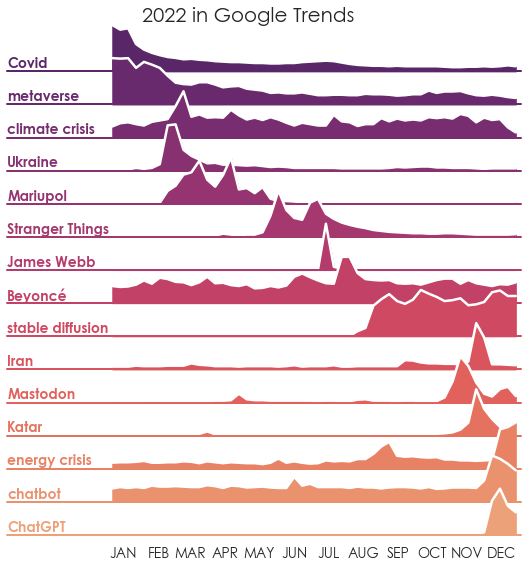

In [25]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), "font.family": FONT})
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["font.family"] = [FONT]

g = sns.FacetGrid(df_longform, row="Keyword", hue="Keyword",
                  aspect=15, height=.55, palette='flare_r')

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontsize=14, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "date")
g.map(plt.plot, 'date', 'Interest', color='white', linewidth=2.5)
g.map(plt.fill_between, "date", "Interest", alpha=1)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

g.figure.subplots_adjust(hspace=-.35)

g.set_titles("")
g.set(yticks=[], ylabel="", xlabel='', xlim=[datetime(2021, 10, 1), datetime.today()],
      xticks=[datetime(2022, i, 12) for i in range(1, 13)], 
      xticklabels=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                   'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
g.despine(bottom=True, left=True)
plt.suptitle("2022 in Google Trends", fontsize=20)
plt.savefig("2022_google_trends_worldwide.png", dpi=300)